In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(mouse_metadata, study_results, how="inner", on=["Mouse ID"])

# Display the data table for preview
# study_data_complete[study_data_complete["Mouse ID"] == 'k403'] # Just one mouse
study_data_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
study_data_complete.nunique()['Mouse ID']

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#  HAVING COUNT(*) > 1
# study_data_complete.groupby(['Mouse ID', 'Timepoint']).filter(lambda x: len(x) > 1)
pd.DataFrame(study_data_complete.groupby(['Mouse ID', 'Timepoint']).filter(lambda x: len(x) > 1)['Mouse ID'].unique())


,0
0,g989


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
#  HAVING COUNT(*) > 1

study_data_complete.groupby(['Mouse ID', 'Timepoint']).filter(lambda x: len(x) > 1)



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Need to set index to Mouse ID so you can drop by row label(aka index), then reset index so Mouse ID is available again
df = study_data_complete.set_index('Mouse ID').drop('g989', axis=0).reset_index()


In [7]:
# Checking the number of mice in the clean DataFrame.
df.nunique()['Mouse ID']

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
group_regimen = df.groupby('Drug Regimen')
frame = {
    'Mean': group_regimen['Tumor Volume (mm3)'].mean(),
    'Median': group_regimen['Tumor Volume (mm3)'].median(),
    'Variance': group_regimen['Tumor Volume (mm3)'].var(),
    'StdDev': group_regimen['Tumor Volume (mm3)'].std(),
    'SEM': group_regimen['Tumor Volume (mm3)'].sem(),
}
tumorVolumeStatsByRegimen = pd.DataFrame(frame)
tumorVolumeStatsByRegimen

,Mean,Median,Variance,StdDev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
# group_regimen["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
df.groupby('Drug Regimen')["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

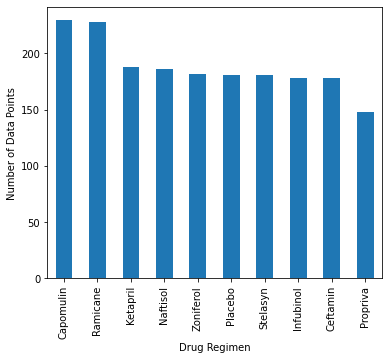

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
x = df['Drug Regimen'].unique()
group_regimen_timepoint = df.groupby(['Drug Regimen'])
y = group_regimen_timepoint['Mouse ID'].count()
bdf = pd.DataFrame({'Number of mice': y}, index=x).sort_values(['Number of mice'], ascending=False)
ax = bdf.plot.bar(figsize=(6,5), rot=90, xlabel='Drug Regimen', ylabel='Number of Data Points', legend=False) # Rotate xaxis labels 90 degrees


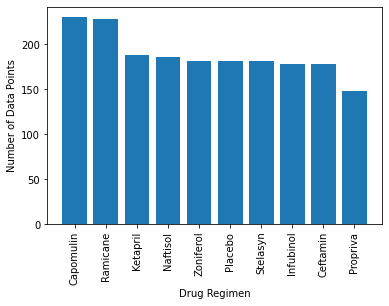

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
# x = df['Drug Regimen'].unique()
# y = group_regimen['Mouse ID'].nunique()

x = bdf.index
y = bdf.values[:,0]

# Matplotlib API requires lists
# Bar chart
fig = plt.figure()
plt.bar(x,y)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.xticks(rotation=90) # Rotate xaxis labels 90 degrees
plt.show()



<AxesSubplot:ylabel='Sex'>

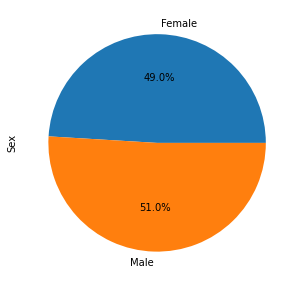

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
group_s = df.groupby(['Sex'])
bdf = pd.DataFrame(group_s.count()['Mouse ID'])
bdf.plot.pie(y = 'Mouse ID', figsize=(5,5), legend=False, autopct='%1.1f%%',ylabel='Sex')



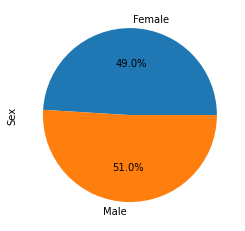

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
x = bdf.values[:,0] # Gets first column from the ndarray of values
y = bdf.index.to_list()

# Matplotlib API requires lists
fig = plt.figure()
plt.ylabel('Sex')
plt.pie(x, labels = y, autopct='%1.1f%%')
plt.show()



## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# foo = df.groupby(['Mouse ID', 'Drug Regimen']).max()['Timepoint']
foo = pd.DataFrame(df.groupby(['Mouse ID']).max()['Timepoint'])

# Rename Timepoint to Max Timepoint for clarity after merge
foo.columns=['Max Timepoint'] 

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
bar = pd.merge(df, foo, how="inner", on=["Mouse ID"])

# Filter by Max Timepoint and only those 4 regimens
baz = bar[(bar['Timepoint'] == bar['Max Timepoint']) & (bar['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']))]
buz = baz.sort_values(['Drug Regimen', 'Mouse ID'])[['Mouse ID', 'Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']]

buz

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
309,b128,Capomulin,45,38.982878
299,b742,Capomulin,45,38.939633
64,f966,Capomulin,20,30.485985
244,g288,Capomulin,45,37.074024
360,g316,Capomulin,45,40.159220
...,...,...,...,...
59,s508,Ramicane,45,30.276232
410,u196,Ramicane,45,40.667713
449,w678,Ramicane,5,43.166373
453,y449,Ramicane,15,44.183451


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumorVolData = []

# Calculate the IQR (Interquartile Range(IQR)) and quantitatively determine if there are any potential outliers. 

for treatment in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    goo = buz[buz['Drug Regimen'] == treatment]
    # tumorVolData.append(goo['Tumor Volume (mm3)'])
    # add subset 
    tumorVolData.append(goo['Tumor Volume (mm3)']) # .array
# tumorVolData

    # Determine outliers using upper and lower bounds
    Q1=goo['Tumor Volume (mm3)'].quantile(0.25)
    Q3=goo['Tumor Volume (mm3)'].quantile(0.75)
    IQR=Q3-Q1
    lowqe_bound=Q1 - 1.5 * IQR
    upper_bound=Q3 + 1.5 * IQR
    # print(lowqe_bound,upper_bound)

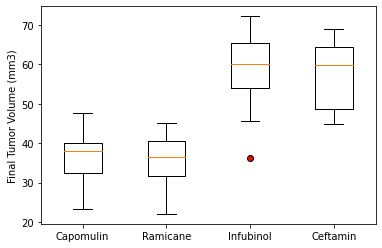

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig = plt.figure()
# Create an axes instance
# ax = fig.add_axes([0,0,1,1])
# Create the boxplot
plt.boxplot(tumorVolData, labels=treatments, flierprops={'markerfacecolor':'red'}) # showfliers=True causes dot to appear for Infubinol
# ax.set_xlabel(treatments)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

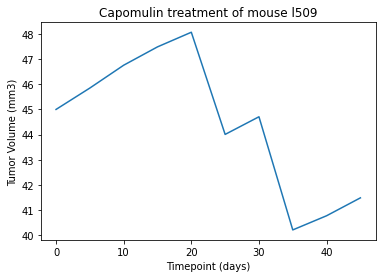

In [17]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
l509 = df[df['Mouse ID'] == 'l509'].sort_values('Timepoint')[['Timepoint', 'Tumor Volume (mm3)']]
x = l509['Timepoint']
y = l509.values[:,1] # Gets second column of DataFrame as ndarray
x
# Line chart
fig = plt.figure()
plt.plot(x,y)
plt.title('Capomulin treatment of mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


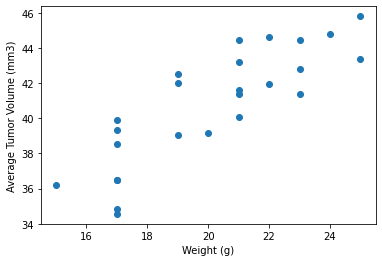

In [18]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
weights = df[df['Drug Regimen'] == 'Capomulin'].groupby('Mouse ID').mean()[['Weight (g)', 'Tumor Volume (mm3)']]
x = weights['Weight (g)'] #.tolist() will convert from float64 to float
y = weights.values[:,1] # Gets second column of DataFrame as ndarray

# Scatter chart
fig = plt.figure()
# ax = fig.add_axes([0,0,1,1]) # [left, bottom, width, height] https://www.tutorialspoint.com/matplotlib/matplotlib_axes_class.htm
# ax.scatter(x,y)
plt.plot(x, y, 'o', label='Weight (g)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

In [19]:
## Correlation and Regression

R-squared: 0.708857


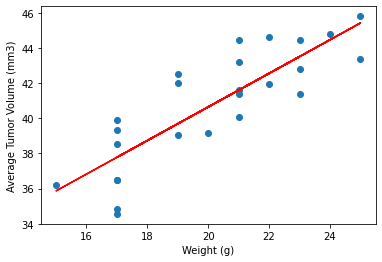

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html
slope, intercept, r_value, p_value, std_err = st.linregress(x,y)
# print("slope: %f    intercept: %f" % (slope, intercept))

# coefficient of determination (R-squared):
print("R-squared: %f" % r_value**2)

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r')
plt.show()
